學習曲線是很有用的東西，我們藉由繪製它可以找到模型的缺點。比如以下的圖片：

(1) 左上角代表低度適合(高度偏誤)你的model太簡單，必須增加模型參數的個數。比方說：蒐集或建立額外的特徵，或著降低正規化的程度(SVM或邏輯斯回歸)。

(2) 右上角的圖片代表過度適合(overfitting)(高變異性)，可以發現到兩條曲線之間分得太開。這代表我們的模型太複雜，因此要增加正規化參數的值。對於非正規化的模型，可以藉由特徵選擇或特徵提取來做降維。

(3) 右下角則是我們比較喜歡的學習曲線

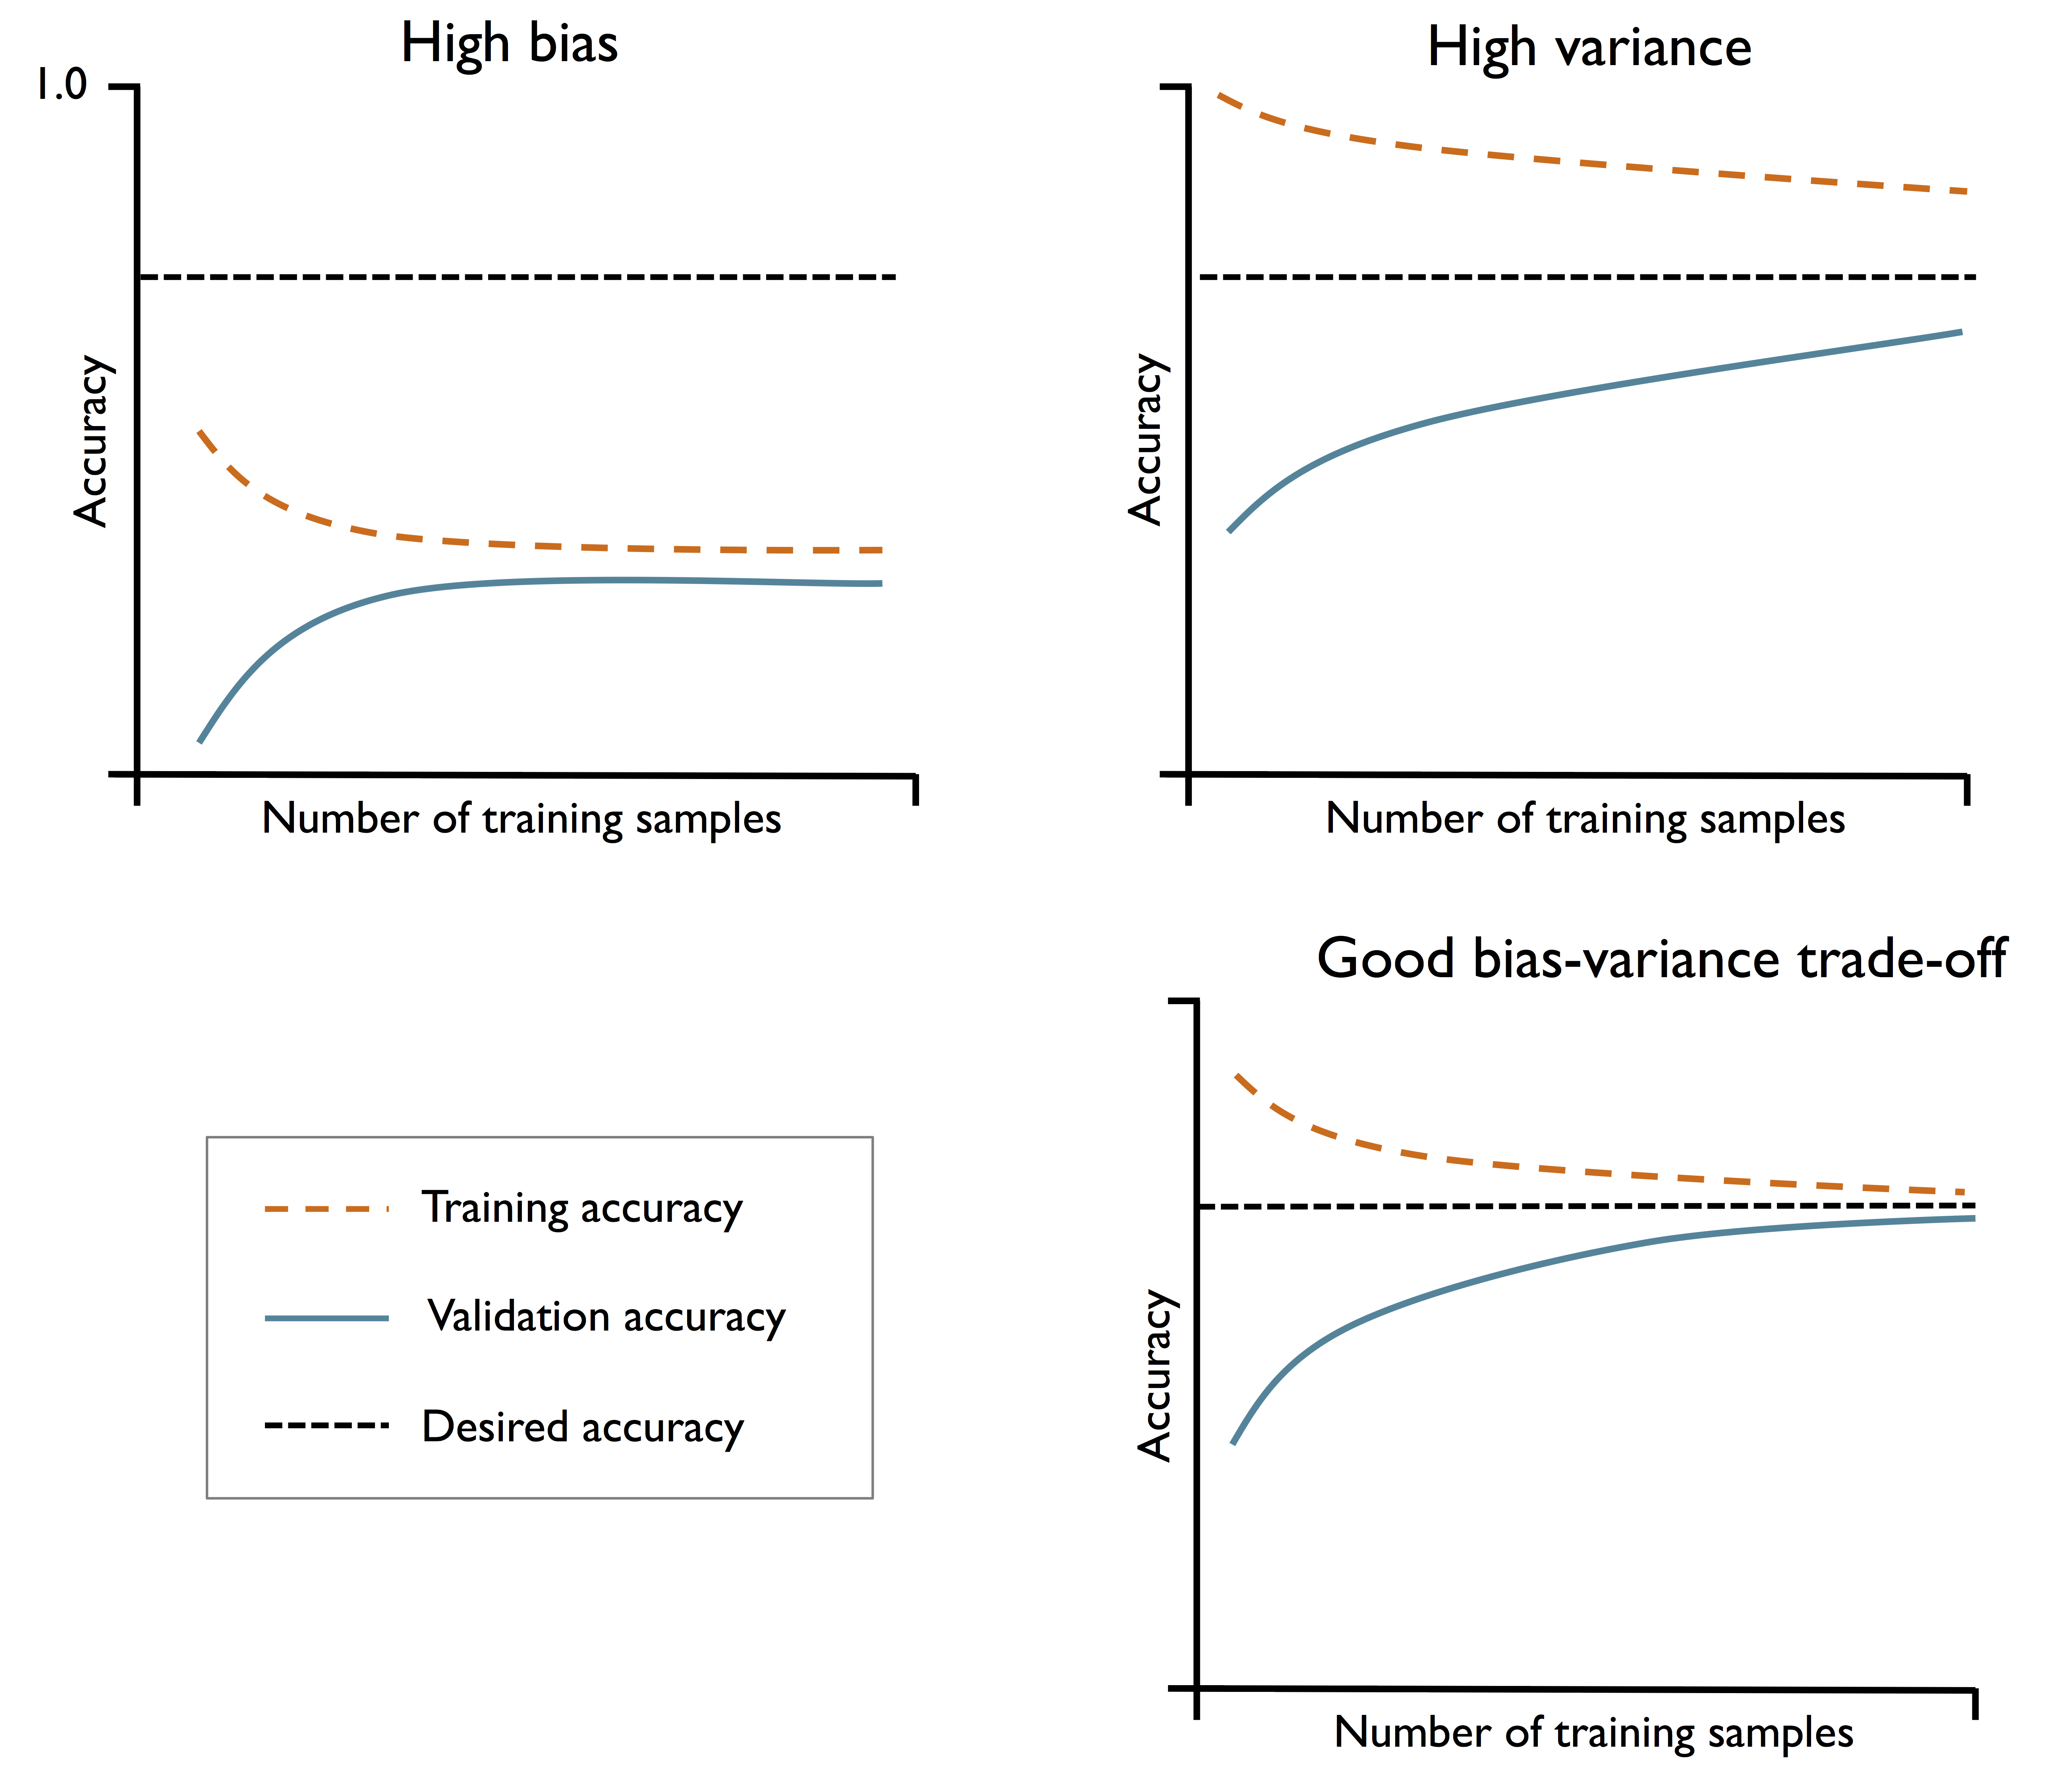

In [4]:
from IPython.display import Image
%matplotlib inline
Image(filename='overfitting.png', width=600) 

我們來用乳癌數據集來試試看

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

df = pd.read_csv('wdbc.data', header=None) # 讀取乳癌數據集

# 類別mapping: M=1, B=0
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_
le.transform(['M', 'B'])

# 以8:2的比例製造測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1) 

# 用pipeline train
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', C=0.08, random_state=1, solver='lbfgs', multi_class='ovr'))

用Python畫畫看

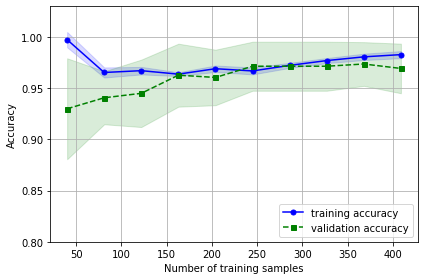

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 計算正確率
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10, # 取十折
                               n_jobs=1)

# 計算對訓練集與測試集預測後的正確率與標準差
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 繪圖區
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

接著我們介紹$\textbf{驗證曲線}$。它是將訓練集與測試集的預測正確率對某個超參數的關係圖。對邏輯斯回歸中的參數C來繪製驗證曲線，可以用Python實作如下：

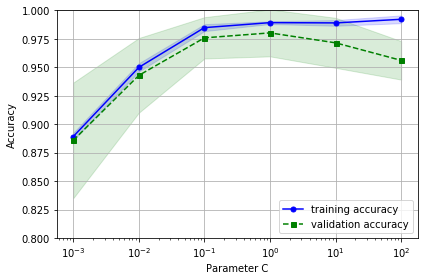

In [11]:
from sklearn.model_selection import validation_curve
import warnings

warnings.filterwarnings('ignore')

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10) # cross validation取十折

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

上圖的解釋：
(1) 最左邊：正確率太低，模型低度適合
(2) 最右邊：兩者差太多，出現Overfitting的現象
(3) 0.01~0.1：較理想的模型